## Multivariate Regression

In [1]:
require(datasets)
data(swiss)
?swiss

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socio-economic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  Fertility         Ig,‘common standardized fertility measure’      
                                                                               
       [,2]  Agriculture       % of males involved in agriculture 
                               as occupation 
       [,3]  Examination       % draftees receiving highest mark 
                               on army examination 
       [,4]  Education         % education beyond primary school for draftees. 
       [,5]  Catholic          % ‘catholic’ (as opposed to ‘protestant’).      
       [,6]  Infant.Mortality  live births who live less than 1year.           
      
     All variables but ‘Fertility’ give proportions of the population.

_D_e_t_a_i_l_s:

     (paraphrasing Mosteller and Tukey):

     Switzerland, in 1888, was entering a period known as the
     _demographic transition_; i.e., its fertility was beginning to
     fall from the high level typical of underdeveloped countries.

     The data collected are for 47 French-speaking “provinces” at about
     1888.

     Here, all variables are scaled to [0, 100], where in the original,
     all but ‘"Catholic"’ were scaled to [0, 1].

_N_o_t_e:

     Files for all 182 districts in 1888 and other years have been
     available at <URL:
     https://opr.princeton.edu/archive/pefp/switz.aspx>.

     They state that variables ‘Examination’ and ‘Education’ are
     averages for 1887, 1888 and 1889.

_S_o_u_r_c_e:

     Project “16P5”, pages 549-551 in

     Mosteller, F. and Tukey, J. W. (1977) _Data Analysis and
     Regression: A Second Course in Statistics_.  Addison-Wesley,
     Reading Mass.

     indicating their source as “Data used by permission of Franice van
     de Walle. Office of Population Research, Princeton University,
     1976.  Unpublished data assembled under NICHD contract number No
     1-HD-O-2077.”

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(swiss, panel = panel.smooth, main = "swiss data",
           col = 3 + (swiss$Catholic > 50))
     summary(lm(Fertility ~ . , data = swiss))

In [3]:
library(GGally)
library(ggplot2)
g <- NULL
g <- ggpairs(swiss
            , lower = list(continuous = 'smooth')
            , params = c(method = 'loess')
            )
g

ERROR: Error in stop_if_params_exist(params): 'params' is a deprecated argument.  Please 'wrap' the function to supply arguments. help("wrap", package = "GGally")


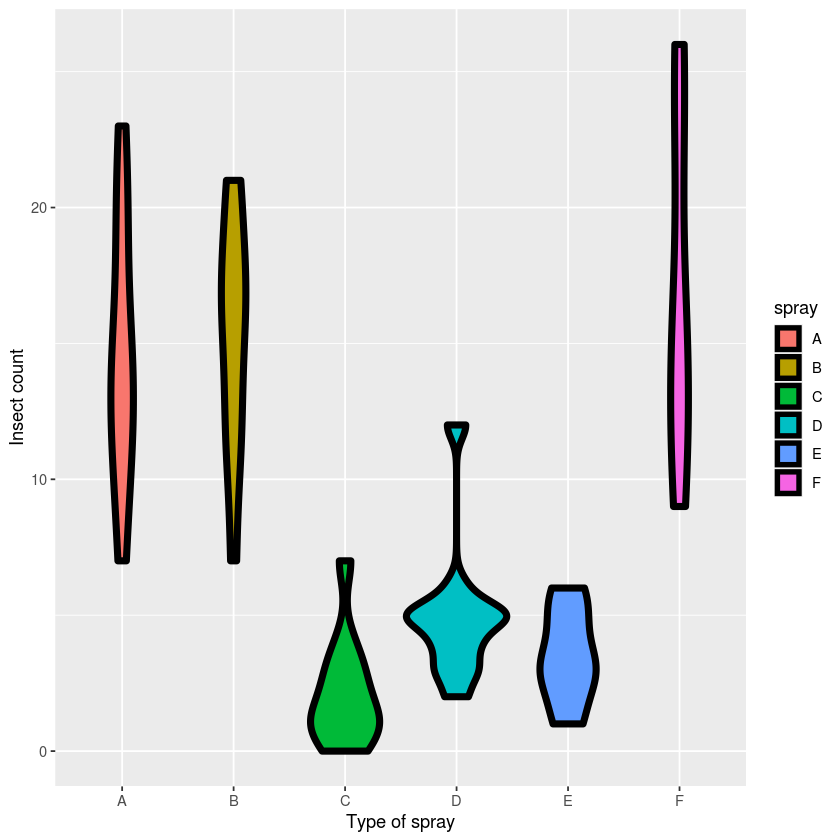

In [6]:
require(stats)
require(datasets)
data(InsectSprays)
g <- NULL;
g <- ggplot(data = InsectSprays, aes(y = count, x = spray, fill = spray))
g <- g + geom_violin(color = "black", size = 2)
g <- g + xlab("Type of spray") + ylab("Insect count")
g

In [7]:
head(InsectSprays)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


- **Intercept: mean of spray A**
- **Coefficient**: e.g. coef(spraC)=-12.42 means the difference between spray C - spray A

In [9]:
fit <- lm(count~spray, data = InsectSprays)
fit_sum <- summary(fit)
fit_sum


Call:
lm(formula = count ~ spray, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.5000     1.1322  12.807  < 2e-16 ***
sprayB        0.8333     1.6011   0.520    0.604    
sprayC      -12.4167     1.6011  -7.755 7.27e-11 ***
sprayD       -9.5833     1.6011  -5.985 9.82e-08 ***
sprayE      -11.0000     1.6011  -6.870 2.75e-09 ***
sprayF        2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


In [12]:
fit2 <- lm(count ~ I(1 * (spray == "B")) + I(1 * (spray == "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * (spray == "F")), data = InsectSprays)
fit2_sum = summary(fit2)
fit2_sum


Call:
lm(formula = count ~ I(1 * (spray == "B")) + I(1 * (spray == 
    "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * 
    (spray == "F")), data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.5000     1.1322  12.807  < 2e-16 ***
I(1 * (spray == "B"))   0.8333     1.6011   0.520    0.604    
I(1 * (spray == "C")) -12.4167     1.6011  -7.755 7.27e-11 ***
I(1 * (spray == "D"))  -9.5833     1.6011  -5.985 9.82e-08 ***
I(1 * (spray == "E")) -11.0000     1.6011  -6.870 2.75e-09 ***
I(1 * (spray == "F"))   2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


In [13]:
## What if we include all 6 factors?
fit3 <- lm(count ~ I(1 * (spray == "B")) + I(1 * (spray == "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * (spray == "F")) + + I(1 * (spray == "A")), data = InsectSprays)
fit3_sum = summary(fit3)
fit3_sum



Call:
lm(formula = count ~ I(1 * (spray == "B")) + I(1 * (spray == 
    "C")) + I(1 * (spray == "D")) + I(1 * (spray == "E")) + I(1 * 
    (spray == "F")) + +I(1 * (spray == "A")), data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.5000     1.1322  12.807  < 2e-16 ***
I(1 * (spray == "B"))   0.8333     1.6011   0.520    0.604    
I(1 * (spray == "C")) -12.4167     1.6011  -7.755 7.27e-11 ***
I(1 * (spray == "D"))  -9.5833     1.6011  -5.985 9.82e-08 ***
I(1 * (spray == "E")) -11.0000     1.6011  -6.870 2.75e-09 ***
I(1 * (spray == "F"))   2.1667     1.6011   1.353    0.181    
I(1 * (spray == "A"))       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	

In [14]:
## What if we omit the intercept?
fit4 <- lm(count ~ spray - 1, data = InsectSprays)
fit4_sum = summary(fit4)
fit4_sum


Call:
lm(formula = count ~ spray - 1, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
sprayA   14.500      1.132  12.807  < 2e-16 ***
sprayB   15.333      1.132  13.543  < 2e-16 ***
sprayC    2.083      1.132   1.840  0.07024 .  
sprayD    4.917      1.132   4.343 4.95e-05 ***
sprayE    3.500      1.132   3.091  0.00292 ** 
sprayF   16.667      1.132  14.721  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.9003,	Adjusted R-squared:  0.8912 
F-statistic: 99.33 on 6 and 66 DF,  p-value: < 2.2e-16


In [16]:
library(dplyr)
summarize(group_by(InsectSprays, spray), mn = mean(count))

`summarise()` ungrouping output (override with `.groups` argument)



spray,mn
<fct>,<dbl>
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


如果想要改变默认的factor 1作为reference的情况，可以使用`relevel()`命令

In [21]:
spray2 <- relevel(InsectSprays$spray, "C")
#InsectSprays$spray == spray2

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

## ANCOVA

In [24]:
library(datasets)
data(swiss)
?swiss

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socio-economic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  Fertility         Ig,‘common standardized fertility measure’      
                                                                               
       [,2]  Agriculture       % of males involved in agriculture 
                               as occupation 
       [,3]  Examination       % draftees receiving highest mark 
                               on army examination 
       [,4]  Education         % education beyond primary school for draftees. 
       [,5]  Catholic          % ‘catholic’ (as opposed to ‘protestant’).      
       [,6]  Infant.Mortality  live births who live less than 1year.           
      
     All variables but ‘Fertility’ give proportions of the population.

_D_e_t_a_i_l_s:

     (paraphrasing Mosteller and Tukey):

     Switzerland, in 1888, was entering a period known as the
     _demographic transition_; i.e., its fertility was beginning to
     fall from the high level typical of underdeveloped countries.

     The data collected are for 47 French-speaking “provinces” at about
     1888.

     Here, all variables are scaled to [0, 100], where in the original,
     all but ‘"Catholic"’ were scaled to [0, 1].

_N_o_t_e:

     Files for all 182 districts in 1888 and other years have been
     available at <URL:
     https://opr.princeton.edu/archive/pefp/switz.aspx>.

     They state that variables ‘Examination’ and ‘Education’ are
     averages for 1887, 1888 and 1889.

_S_o_u_r_c_e:

     Project “16P5”, pages 549-551 in

     Mosteller, F. and Tukey, J. W. (1977) _Data Analysis and
     Regression: A Second Course in Statistics_.  Addison-Wesley,
     Reading Mass.

     indicating their source as “Data used by permission of Franice van
     de Walle. Office of Population Research, Princeton University,
     1976.  Unpublished data assembled under NICHD contract number No
     1-HD-O-2077.”

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     pairs(swiss, panel = panel.smooth, main = "swiss data",
           col = 3 + (swiss$Catholic > 50))
     summary(lm(Fertility ~ . , data = swiss))

In [25]:
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


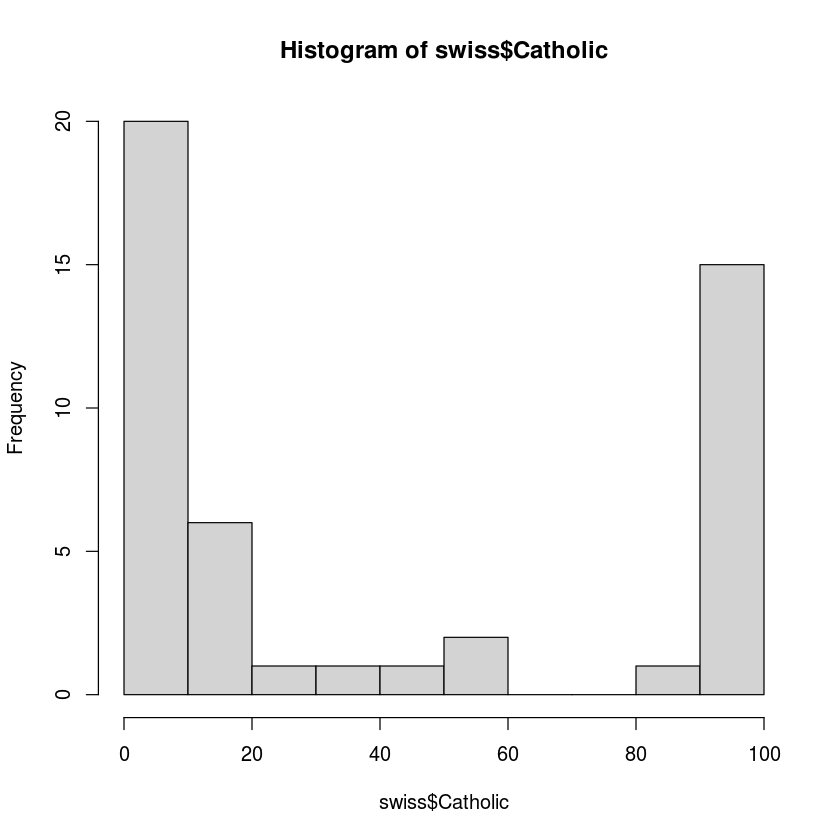

In [23]:
hist(swiss$Catholic)

In [27]:
library(dplyr)
swiss = mutate(swiss, CatholicBin = 1 * (Catholic > 50))
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,CatholicBin
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,80.2,17.0,15,12,9.96,22.2,0
2,83.1,45.1,6,9,84.84,22.2,1
3,92.5,39.7,5,5,93.40,20.2,1
4,85.8,36.5,12,7,33.77,20.3,0
5,76.9,43.5,17,15,5.16,20.6,0
6,76.1,35.3,9,7,90.57,26.6,1


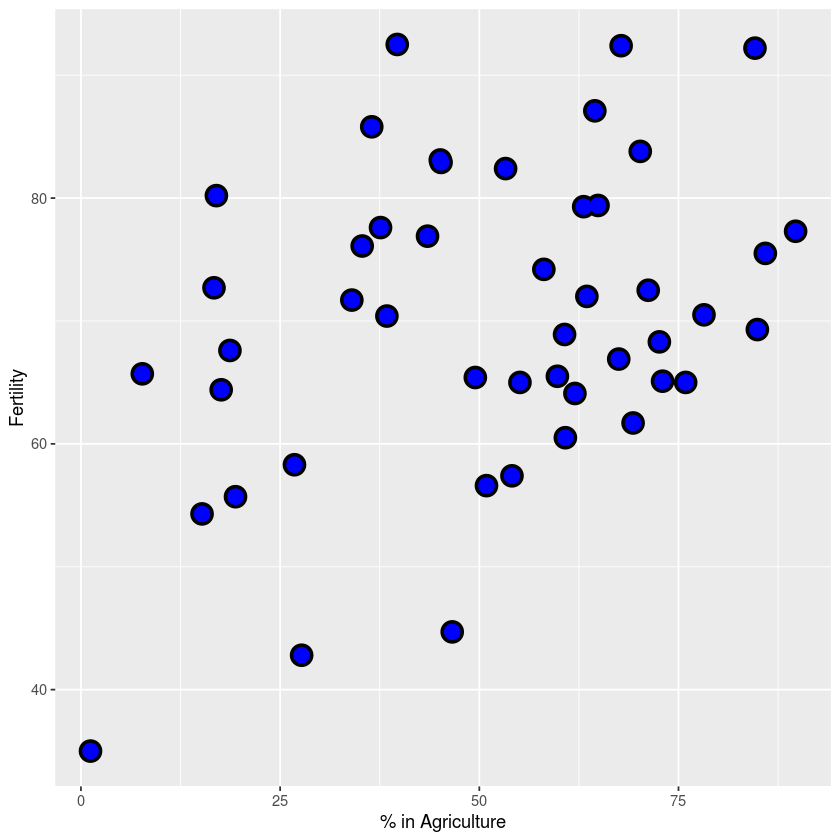

In [32]:
library(ggplot2)
g <- NULL
g <- ggplot(data=swiss
           , aes(x = Agriculture, y = Fertility, Colour = factor(CatholicBin))
           )
g <- g + geom_point(size = 6
                   , colour = 'black'
                   )
g <- g + geom_point(size = 4
                   , colour = 'blue'
                   )
g <- g + xlab("% in Agriculture") + ylab("Fertility")
g

In [35]:
fit <- lm(Fertility ~ Agriculture + factor(CatholicBin), data = swiss)
summary(fit)


Call:
lm(formula = Fertility ~ Agriculture + factor(CatholicBin), data = swiss)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.803  -6.701   1.382   6.855  20.435 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           60.8322     4.1059  14.816   <2e-16 ***
Agriculture            0.1242     0.0811   1.531   0.1329    
factor(CatholicBin)1   7.8843     3.7484   2.103   0.0412 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.39 on 44 degrees of freedom
Multiple R-squared:  0.2046,	Adjusted R-squared:  0.1685 
F-statistic:  5.66 on 2 and 44 DF,  p-value: 0.006492


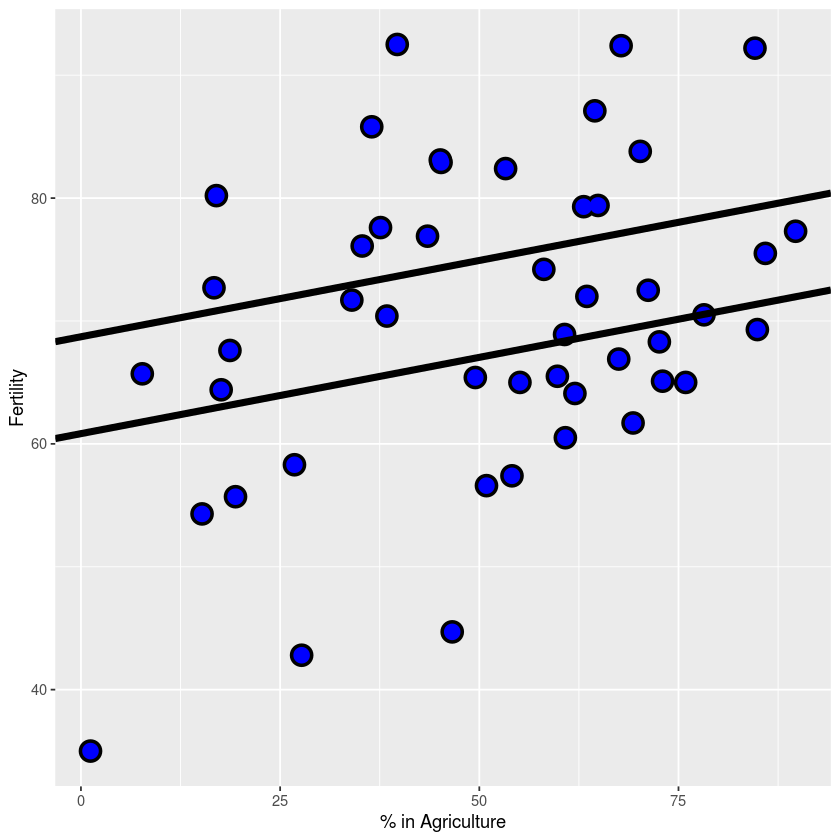

In [36]:
g1 = g
g1 <- g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1 <- g1 + geom_abline(intercept = coef(fit)[1] + coef(fit)[3], slope = coef(fit)[2], size = 2)
g1

In [37]:
fit <- lm(Fertility ~ Agriculture * factor(CatholicBin), data = swiss)
summary(fit)


Call:
lm(formula = Fertility ~ Agriculture * factor(CatholicBin), data = swiss)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.840  -6.668   1.016   7.092  20.242 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      62.04993    4.78916  12.956   <2e-16 ***
Agriculture                       0.09612    0.09881   0.973    0.336    
factor(CatholicBin)1              2.85770   10.62644   0.269    0.789    
Agriculture:factor(CatholicBin)1  0.08914    0.17611   0.506    0.615    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.49 on 43 degrees of freedom
Multiple R-squared:  0.2094,	Adjusted R-squared:  0.1542 
F-statistic: 3.795 on 3 and 43 DF,  p-value: 0.01683


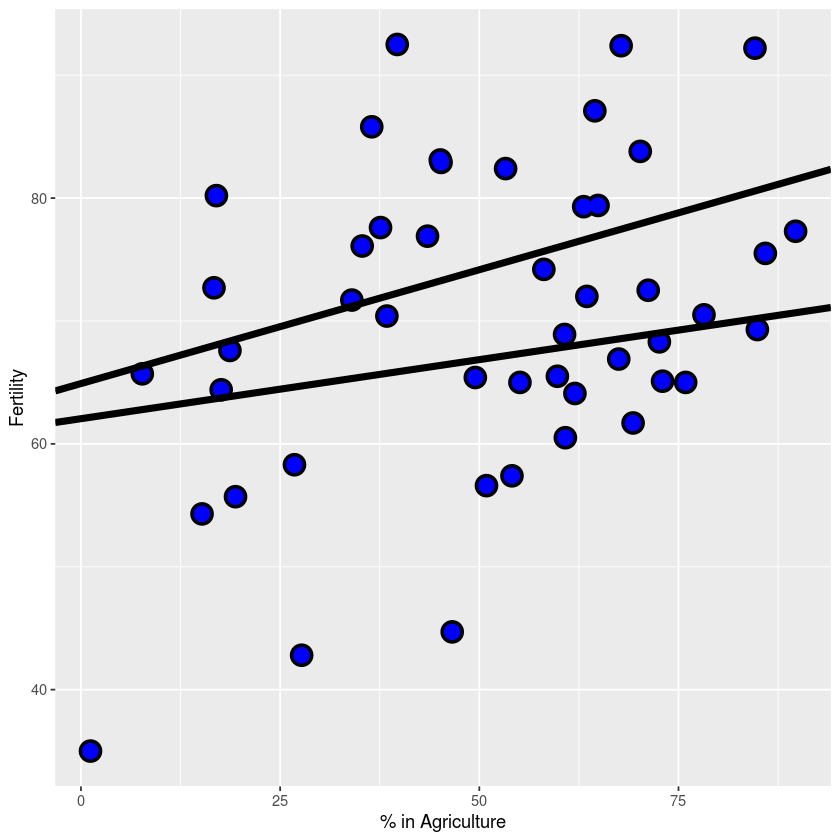

In [39]:
g1 = g
g1 <- g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1 <- g1 + geom_abline(intercept = coef(fit)[1] + coef(fit)[3]
                       , slope = coef(fit)[2] + coef(fit)[4]
                       , size = 2)
g1

## Adjustment

In [42]:
library(rgl)
plot3d(x1, x2, y)

ERROR: Error in plot3d(x1, x2, y): object 'x1' not found


## Residuals again

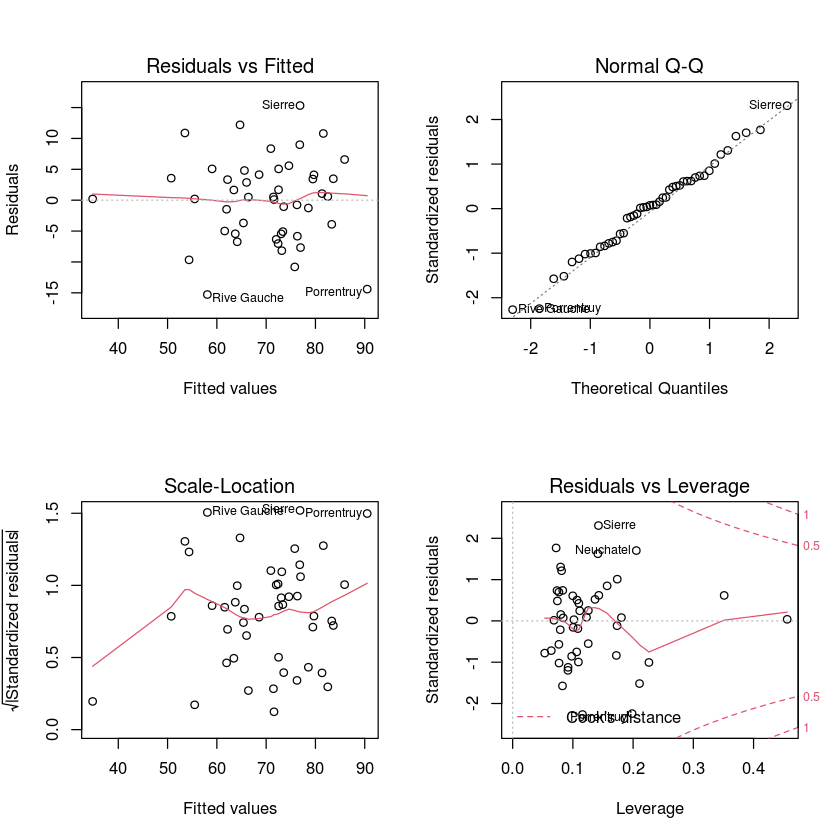

In [1]:
data(swiss)
par(mfrow = c(2,2))
fit <- lm(Fertility ~., data = swiss)
plot(fit)

### Outliers

- **Outliers** can be the result of spurious or real processess
- Outliers can conform to the regression relationship (i.e. being marginally outling in X or Y, but not outlying given the regression relationship)
- **Influence measures**: do `?influence.measure` to see the full suite of incluence measures in stats. the measures include
    - *rstandard*: standarized residuals, residuals divided by their standard deviations
    - *rstudent*: standardized residuals
    - *hatvalues*: measures of leverage
    - *diffits*
    - *dffits*
    - *dfbetas*
    - *cooks.distance*
    - resid*
    - *resid(fit)*

### Model selection  
These lectures represents a challenging question: “How do we chose what variables to include in a regression model?”. Sadly, no single easy answer exists and the most reasonable answer would be “It depends.”. These concepts bleed into ideas of machine learning, which is largely focused on high dimensional variable selection and weighting. In the following lectures we cover some of the basics and, most importantly, the consequences of over- and under-fitting a model.

In [3]:
fit1 <- lm(Fertility ~ Agriculture, data = swiss)
fit3 <- update(fit1, Fertility ~ Agriculture + Examination + Education)
fit5 <- update(fit1, Fertility ~ Agriculture + Examination + Education + Catholic + Infant.Mortality)
anova(fit1, fit3, fit5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45,6283.116,NA,NA,NA,NA
2,43,3180.925,2,3102.191,30.21074,8.637826e-09
3,41,2105.043,2,1075.882,10.47750,2.111080e-04


In [4]:
library(UsingR)
data(galton)
mean(galton$child)

[1] 68.08847

In [7]:
unique(InsectSprays$spray)

[1] A B C D E F
Levels: A B C D E F

In [8]:
head(InsectSprays)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


In [10]:
spray2 <- relevel(InsectSprays$spray, "C")
head(spray2)

[1] A A A A A A
Levels: C A B D E F

In [11]:
-0.29340 - 0.03

[1] -0.3234

## Quiz 3

In [2]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
mtcars2 <- mtcars
mtcars2$cyl <- as.factor(mtcars2$cyl)
fit <- lm(mpg ~ wt + cyl, data = mtcars2)
summary(fit)


Call:
lm(formula = mpg ~ wt + cyl, data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5890 -1.2357 -0.5159  1.3845  5.7915 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.9908     1.8878  18.006  < 2e-16 ***
wt           -3.2056     0.7539  -4.252 0.000213 ***
cyl6         -4.2556     1.3861  -3.070 0.004718 ** 
cyl8         -6.0709     1.6523  -3.674 0.000999 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.557 on 28 degrees of freedom
Multiple R-squared:  0.8374,	Adjusted R-squared:   0.82 
F-statistic: 48.08 on 3 and 28 DF,  p-value: 3.594e-11


In [7]:
fit2 <- lm(mpg ~ cyl, data = mtcars2)
summary(fit2)


Call:
lm(formula = mpg ~ cyl, data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6636     0.9718  27.437  < 2e-16 ***
cyl6         -6.9208     1.5583  -4.441 0.000119 ***
cyl8        -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


In [9]:
fit2$coefficients[3]

cyl8 
-11.56364

In [14]:
install.packages("lmtest")

Installing package into ‘/home/yanyuan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [19]:
library(lmtest)
fit <- lm(mpg ~ cyl + wt, data = mtcars2)
fit2 <- lm(mpg ~ cyl + wt + cyl * wt, data = mtcars2)
test <- lrtest(fit, fit2)
test[,'Pr(>Chisq)'][2]

[1] 0.07648824

In [20]:
x <- c(0.586, 0.166, -0.042, -0.614, 11.72)
y <- c(0.549, -0.026, -0.127, -0.751, 1.344)
fit3 <- lm(y ~ x)
hatvalues(fit3)

1         2         3         4         5 
0.2286650 0.2438146 0.2525027 0.2804443 0.9945734

In [50]:
x <- c(0.586, 0.166, -0.042, -0.614, 11.72)
y <- c(0.549, -0.026, -0.127, -0.751, 1.344)
fit4 <- lm(y ~ x)
#db <- dfbeta(fit4)
#which.max(db[,2])
#which.max(hatvalues(fit4))
#dfbeta(fit4)
im <- influence.measures(fit4)
iminfmat <- im$infmat
iminfmat

,dfb.1_,dfb.x,dffit,cov.r,cook.d,hat
1,1.06212391,-0.37811633,1.06794603,0.3412772,2.925794e-01,0.2286650
2,0.06748037,-0.02861769,0.06750799,2.9338458,3.394011e-03,0.2438146
3,-0.01735756,0.00791512,-0.01735800,3.0073613,2.258743e-04,0.2525027
4,-1.24958248,0.67253246,-1.25570867,0.3422019,3.912201e-01,0.2804443
5,0.20432010,-133.82261293,-149.72037760,0.1073304,2.704935e+02,0.9945734


In [52]:
iminfmat[which.max(abs(iminfmat[,5])),2]

[1] -133.8226

In [53]:
install.packages("devtools")
devtools::install_github("jhudsl/collegeIncome")
library(collegeIncome)
data(college)

Installing package into ‘/home/yanyuan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)




✔  checking for file ‘/tmp/RtmpEPRTBu/remotes18d14be8ba9/jhudsl-collegeIncome-795911e/DESCRIPTION’
─  preparing ‘collegeIncome’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘collegeIncome_0.1.0.tar.gz’
   


Installing package into ‘/home/yanyuan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

